# Example 2: BUILD A MULTIPLE LAYER PERCEPTRON FOR CANCER CLASSIFICATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
X = df_cancer.iloc[:,[0,1]]
X

,mean radius,mean texture
0,17.990,10.38
1,20.570,17.77
2,19.690,21.25
3,11.420,20.38
4,20.290,14.34
5,12.450,15.70
6,18.250,19.98
7,13.710,20.83
8,13.000,21.82
9,12.460,24.04


In [6]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

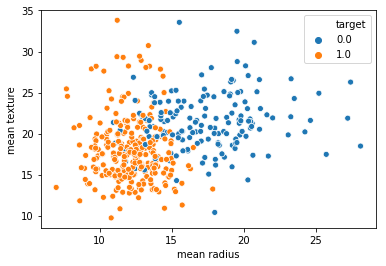

In [7]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

In [8]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)


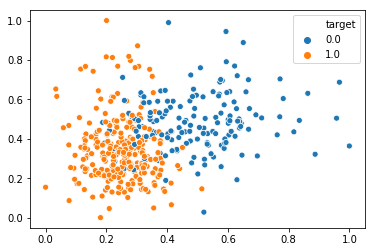

In [9]:

sns.scatterplot(X_train_scaled[:,0], X_train_scaled[:,1], hue=y_train)

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)



# LET'S TRY MORE NEURONS

In [10]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_scaled, y_train, epochs=500, verbose=2)


Epoch 1/500
 - 0s - loss: 0.6789
Epoch 2/500
 - 0s - loss: 0.6674
Epoch 3/500
 - 0s - loss: 0.6550
Epoch 4/500
 - 0s - loss: 0.6429
Epoch 5/500
 - 0s - loss: 0.6296
Epoch 6/500
 - 0s - loss: 0.6147
Epoch 7/500
 - 0s - loss: 0.5990
Epoch 8/500
 - 0s - loss: 0.5831
Epoch 9/500
 - 0s - loss: 0.5644
Epoch 10/500
 - 0s - loss: 0.5469
Epoch 11/500
 - 0s - loss: 0.5271
Epoch 12/500
 - 0s - loss: 0.5075
Epoch 13/500
 - 0s - loss: 0.4870
Epoch 14/500
 - 0s - loss: 0.4672
Epoch 15/500
 - 0s - loss: 0.4482
Epoch 16/500
 - 0s - loss: 0.4306
Epoch 17/500
 - 0s - loss: 0.4134
Epoch 18/500
 - 0s - loss: 0.3978
Epoch 19/500
 - 0s - loss: 0.3830
Epoch 20/500
 - 0s - loss: 0.3722
Epoch 21/500
 - 0s - loss: 0.3584
Epoch 22/500
 - 0s - loss: 0.3482
Epoch 23/500
 - 0s - loss: 0.3392
Epoch 24/500
 - 0s - loss: 0.3304
Epoch 25/500
 - 0s - loss: 0.3257
Epoch 26/500
 - 0s - loss: 0.3181
Epoch 27/500
 - 0s - loss: 0.3134
Epoch 28/500
 - 0s - loss: 0.3065
Epoch 29/500
 - 0s - loss: 0.3010
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.2647
Epoch 239/500
 - 0s - loss: 0.2634
Epoch 240/500
 - 0s - loss: 0.2631
Epoch 241/500
 - 0s - loss: 0.2652
Epoch 242/500
 - 0s - loss: 0.2634
Epoch 243/500
 - 0s - loss: 0.2643
Epoch 244/500
 - 0s - loss: 0.2640
Epoch 245/500
 - 0s - loss: 0.2634
Epoch 246/500
 - 0s - loss: 0.2636
Epoch 247/500
 - 0s - loss: 0.2632
Epoch 248/500
 - 0s - loss: 0.2630
Epoch 249/500
 - 0s - loss: 0.2636
Epoch 250/500
 - 0s - loss: 0.2665
Epoch 251/500
 - 0s - loss: 0.2636
Epoch 252/500
 - 0s - loss: 0.2633
Epoch 253/500
 - 0s - loss: 0.2638
Epoch 254/500
 - 0s - loss: 0.2640
Epoch 255/500
 - 0s - loss: 0.2635
Epoch 256/500
 - 0s - loss: 0.2629
Epoch 257/500
 - 0s - loss: 0.2633
Epoch 258/500
 - 0s - loss: 0.2636
Epoch 259/500
 - 0s - loss: 0.2638
Epoch 260/500
 - 0s - loss: 0.2633
Epoch 261/500
 - 0s - loss: 0.2629
Epoch 262/500
 - 0s - loss: 0.2635
Epoch 263/500
 - 0s - loss: 0.2629
Epoch 264/500
 - 0s - loss: 0.2621
Epoch 265/500
 - 0s - loss: 0.2627
Epoch 266/500
 - 0s - loss: 0.2635

Epoch 473/500
 - 0s - loss: 0.2493
Epoch 474/500
 - 0s - loss: 0.2487
Epoch 475/500
 - 0s - loss: 0.2496
Epoch 476/500
 - 0s - loss: 0.2475
Epoch 477/500
 - 0s - loss: 0.2481
Epoch 478/500
 - 0s - loss: 0.2503
Epoch 479/500
 - 0s - loss: 0.2471
Epoch 480/500
 - 0s - loss: 0.2482
Epoch 481/500
 - 0s - loss: 0.2471
Epoch 482/500
 - 0s - loss: 0.2482
Epoch 483/500
 - 0s - loss: 0.2470
Epoch 484/500
 - 0s - loss: 0.2470
Epoch 485/500
 - 0s - loss: 0.2468
Epoch 486/500
 - 0s - loss: 0.2497
Epoch 487/500
 - 0s - loss: 0.2471
Epoch 488/500
 - 0s - loss: 0.2485
Epoch 489/500
 - 0s - loss: 0.2468
Epoch 490/500
 - 0s - loss: 0.2465
Epoch 491/500
 - 0s - loss: 0.2467
Epoch 492/500
 - 0s - loss: 0.2468
Epoch 493/500
 - 0s - loss: 0.2468
Epoch 494/500
 - 0s - loss: 0.2472
Epoch 495/500
 - 0s - loss: 0.2471
Epoch 496/500
 - 0s - loss: 0.2472
Epoch 497/500
 - 0s - loss: 0.2475
Epoch 498/500
 - 0s - loss: 0.2474
Epoch 499/500
 - 0s - loss: 0.2463
Epoch 500/500
 - 0s - loss: 0.2472


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [12]:

# make a prediction
y_predict = model.predict_classes(X_test_scaled)


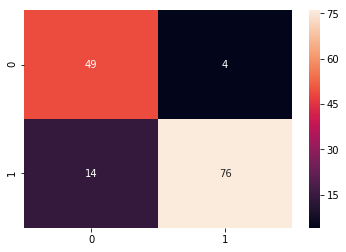

In [13]:

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [14]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       0.78      0.92      0.84        53
        1.0       0.95      0.84      0.89        90

avg / total       0.89      0.87      0.88       143



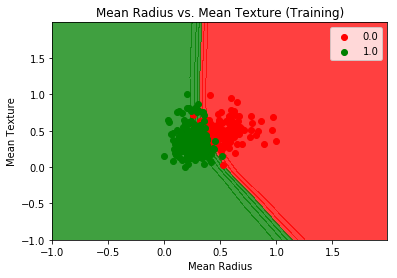

In [15]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [16]:
weights, biases = model.layers[0].get_weights()

In [17]:
weights

array([[-0.03374484,  0.546304  ,  0.70511466, -0.2605315 , -0.41232184,
        -0.17235199,  0.30014268, -0.23429245, -0.51863855,  0.6149148 ,
        -0.75036955,  0.4650482 ,  0.5514734 , -0.35483193,  0.36691168,
        -0.28577608,  0.7412741 , -0.40270233, -0.3504634 ,  0.7472426 ],
       [-0.22986832,  0.18535365,  0.4570664 , -0.08326757,  0.30670157,
        -0.55687654,  0.47329006, -0.18878824, -0.02895423,  0.81647235,
         0.761614  ,  0.26311326,  0.795073  , -0.0688284 , -0.23688638,
        -0.3306842 ,  0.02297717, -0.48401982, -0.22189045,  0.12883942]],
      dtype=float32)

In [18]:
biases

array([ 0.        , -0.11352123, -0.20720126,  0.        ,  0.25538006,
        0.0799235 ,  0.35016143,  0.2856889 ,  0.34993947, -0.16718744,
       -0.13090114, -0.13472454,  0.16726443,  0.31019336,  0.34705225,
        0.        , -0.07798369,  0.        ,  0.        , -0.12689564],
      dtype=float32)

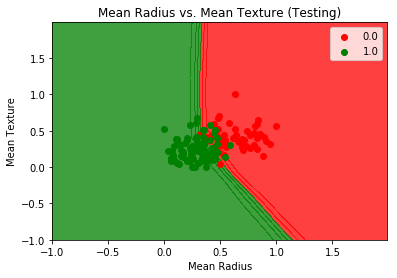

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

# Great Job!